In [1]:
# Se importan Instaladores
#pip install matplotlib
#pip install seaborn

In [2]:
# Se importan librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Lectura de archivo
df = pd.read_csv("cirrhosis.csv")
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
# Descripción general de cada variable
print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T

Tamaño del DataFrame: (418, 20)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,418.0,NaN,NaN,NaN,209.5,120.810458,1.0,105.25,209.5,313.75,418.0
N_Days,418.0,NaN,NaN,NaN,1917.782297,1104.672992,41.0,1092.75,1730.0,2613.5,4795.0
Status,418,3,C,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drug,312,2,D-penicillamine,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,418.0,NaN,NaN,NaN,18533.351675,3815.845055,9598.0,15644.5,18628.0,21272.5,28650.0
Sex,418,2,F,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ascites,312,2,N,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatomegaly,312,2,Y,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spiders,312,2,N,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edema,418,3,N,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Identificar % de los datos con valores nulos
df.isna().mean()*100

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

In [6]:
# Se eliminan los pacientes que no quisieron participar en el estudio. Ninguno de dichos pacientes estaba tomando algún medicamento por 
# ello en los datos vienen como nulos en la variable "Drug"
df = df.dropna(subset=['Drug'])
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [7]:
# Universo de pacientes a estudiar
df.isna().count()

ID               312
N_Days           312
Status           312
Drug             312
Age              312
Sex              312
Ascites          312
Hepatomegaly     312
Spiders          312
Edema            312
Bilirubin        312
Cholesterol      312
Albumin          312
Copper           312
Alk_Phos         312
SGOT             312
Tryglicerides    312
Platelets        312
Prothrombin      312
Stage            312
dtype: int64

In [8]:
# Identifica nuevos valores nulos. Es despreciable el % de nulos en las variables que persisten
df.isna().mean()*100

ID               0.000000
N_Days           0.000000
Status           0.000000
Drug             0.000000
Age              0.000000
Sex              0.000000
Ascites          0.000000
Hepatomegaly     0.000000
Spiders          0.000000
Edema            0.000000
Bilirubin        0.000000
Cholesterol      8.974359
Albumin          0.000000
Copper           0.641026
Alk_Phos         0.000000
SGOT             0.000000
Tryglicerides    9.615385
Platelets        1.282051
Prothrombin      0.000000
Stage            0.000000
dtype: float64

<Axes: >

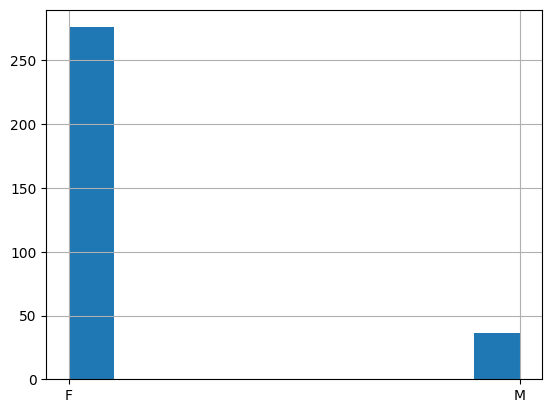

In [9]:
# Se identifica que la variable "Sex" no aporta valor al análisis dada su alta concentración en mujeres
df['Sex'].hist()

In [10]:
# Se eliminan columnas del dataframe que no aportan valor al análisis
df.drop(columns=['ID', 'Sex'], inplace=True)
df.head()

,N_Days,Status,Drug,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [11]:
# Se convierte la variable "Age" a años
df["Age"] = (df["Age"]/365)
df.head()

,N_Days,Status,Drug,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58.805479,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56.484932,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70.120548,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,54.778082,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38.131507,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [12]:
# Se convierte la variable "N_Days" a años
df["N_Days"] = (df["N_Days"]/365)
df.head()

,N_Days,Status,Drug,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1.095890,D,D-penicillamine,58.805479,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,12.328767,C,D-penicillamine,56.484932,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2.772603,D,D-penicillamine,70.120548,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,5.273973,D,D-penicillamine,54.778082,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,4.120548,CL,Placebo,38.131507,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


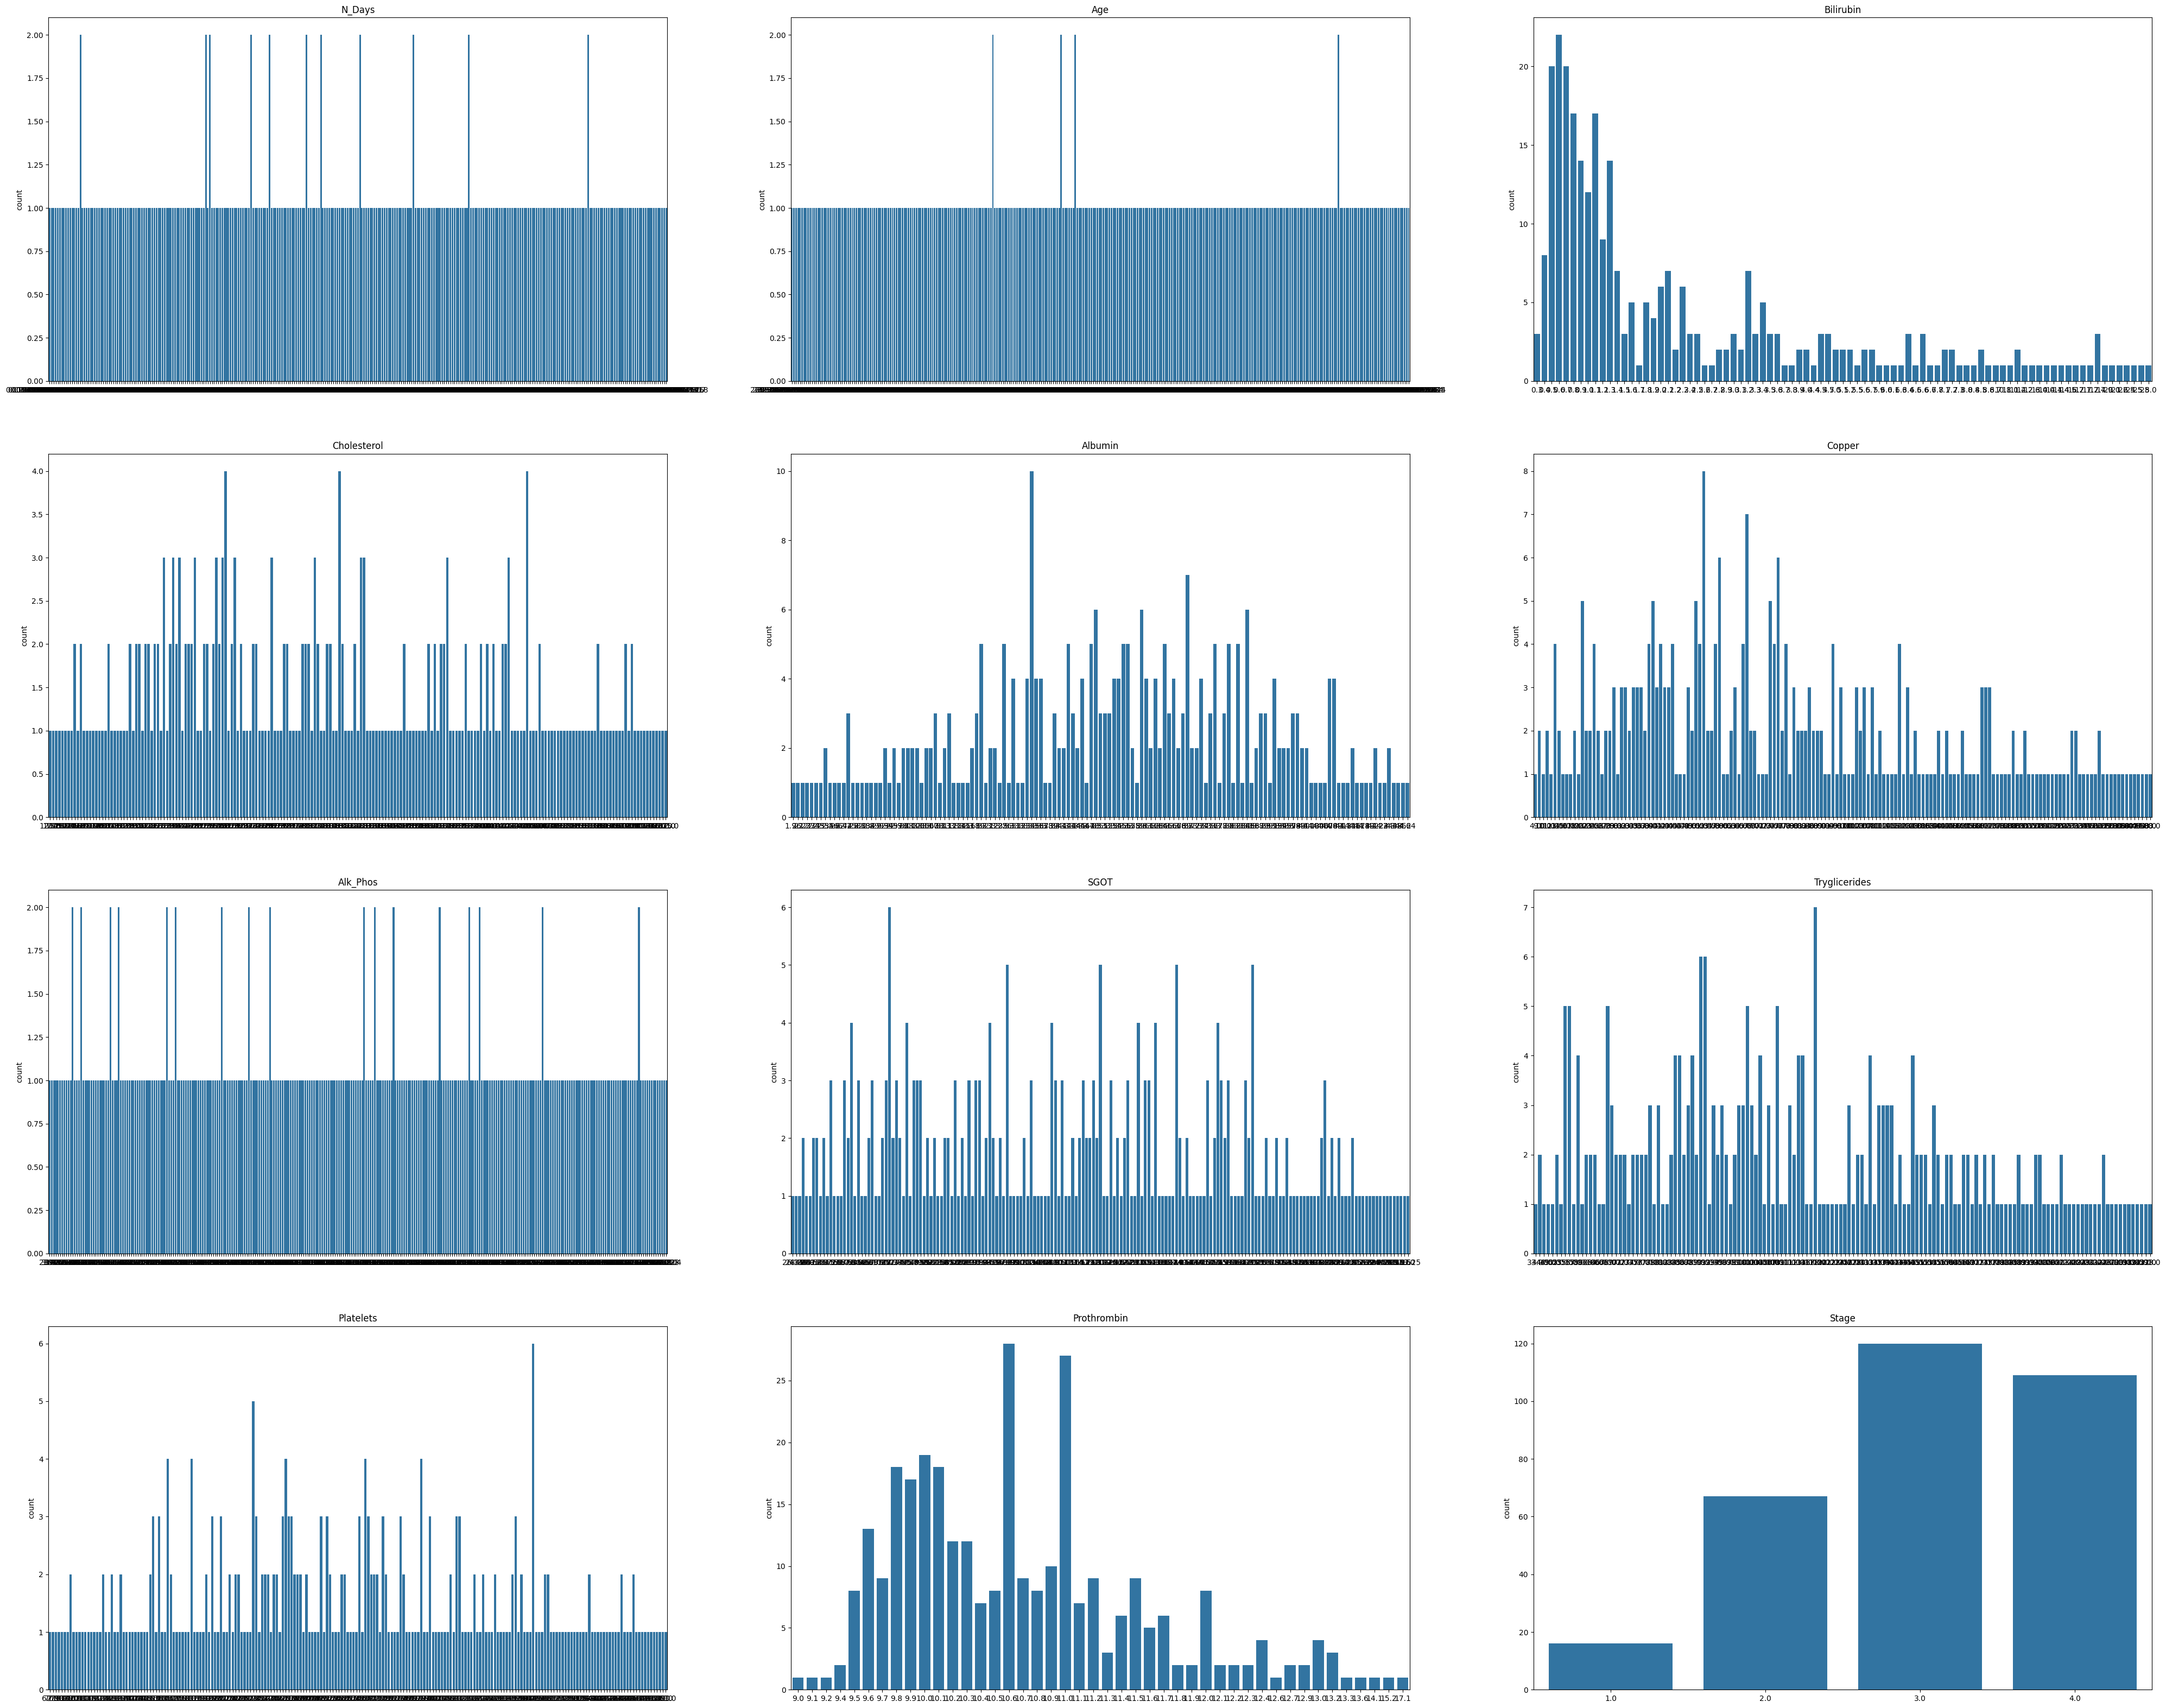

In [13]:
# Se evalúa si las variables númericas requieren alguna transformación
cat_con = df.select_dtypes(include="float64").columns.tolist()

fig, axes = plt.subplots(4,3, figsize=(50,40))
axes = axes.ravel()
for col, ax in zip(df[cat_con], axes):
  sns.countplot(x=df[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)

In [14]:
#
variables = ["Bilirubin","Prothrombin"]
df[variables] = np.log(df[variables])

array([[<Axes: title={'center': 'Bilirubin'}>,
        <Axes: title={'center': 'Prothrombin'}>]], dtype=object)

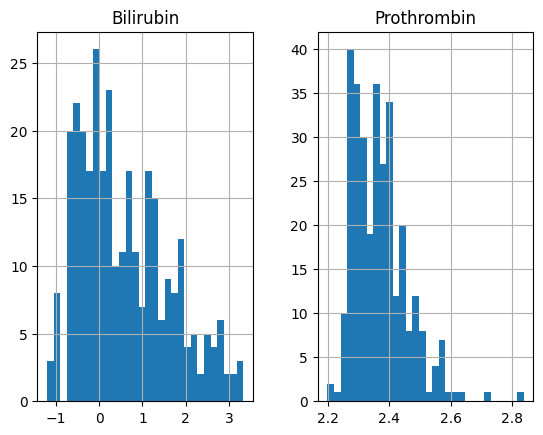

In [15]:
df[variables].hist(bins=30)

In [17]:
df.to_csv('cirrhosis_vMod.csv', index=True)